# Exercise: K-means
## Visualize the prostitution data (e.g. by plotting it on a map)

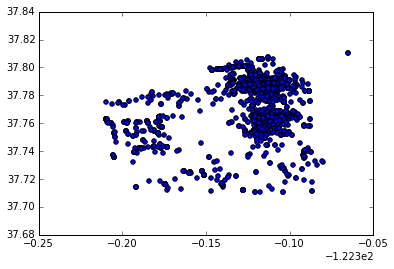

In [42]:
# Imports
import csv
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
%matplotlib inline

Data = []
with open('SFPD_Incidents_-_from_1_January_2003.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        if(row['Category'] == 'PROSTITUTION' and row['Y']!='90'): 
            Data.append([row['X'],row['Y']])

X=[]
Y=[]

for lt in Data:
    X.append(lt[0])
    Y.append(lt[1])

plt.scatter(X,Y)
plt.show()

## Train models of K=2,…,10 on the prostitution data.

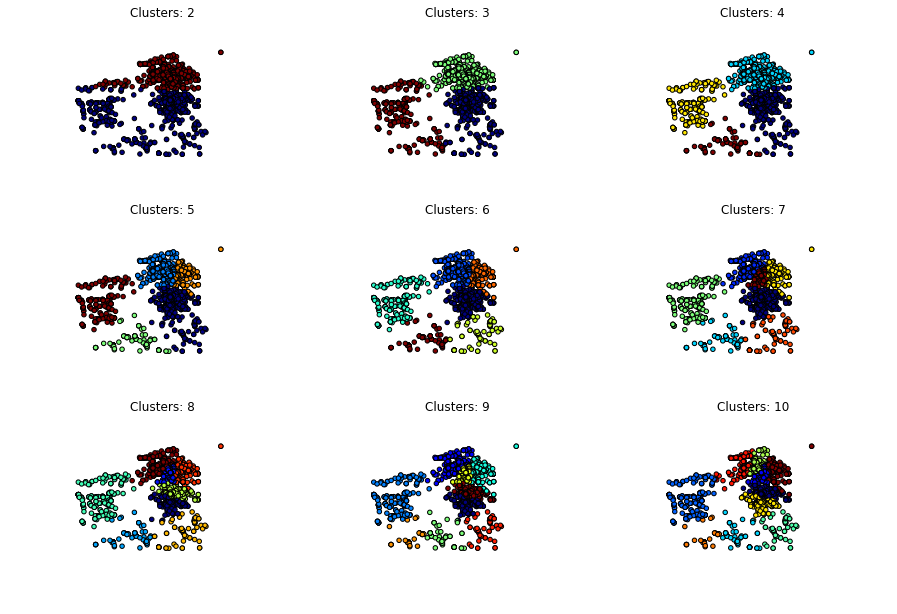

In [43]:
# Fit the data
fig = plt.figure("K-Means",figsize=(15, 10))
for i in range(2,11):
    kmean = cluster.KMeans(n_clusters=i)
    kmean.fit(Data)

    plt.subplot(3,3,i-1)
    plt.title('Clusters: '+str(i))
    plt.axis('off')
    plt.scatter(X,Y,c=kmean.labels_)

plt.show()

## Explore how the total squared error changes as a function of KK and identify what you think is the right number of clusers based on the knee-point in the squared error plot.

In [70]:
from scipy.spatial.distance import cdist, pdist
#
k_means_var = [cluster.KMeans(n_clusters=i).fit(Data) for i in range(2,11)]

#
centroids = [k.cluster_centers_ for k in k_means_var]

#
k_euclid = [cdist(Data,cent,'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

#
wcss = [sum(d**2) for d in dist]

#
tss = sum(pdist(Data)**2)/len(Data)

#
bss = tss-wcss

wcss1 = range(0,len(wcss)-1)
for i in range(0,len(wcss)-1):
    wcss1[i] = wcss[i+1]
    
plt.plot(range(3,11),wcss1)
plt.show()

81620.9102368
[ 2.87204847  4.36584914  4.560975    4.68627047  4.77531169  4.83251484
  4.87105024  4.90483506  4.93694629]


In [90]:
import random

def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [float(v_i) - float(w_i) for v_i, w_i in zip(v, w)]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def vector_add(v, w):
    """adds corresponding elements"""
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose ith element is the mean of the ith elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

class KMeans:
    """performs k-means clustering"""
    def __init__(self, k):
        self.k = k # number of clusters
        self.means = None # means of clusters
        
    def classify(self, inpu):
        """return the index of the cluster closest to the input"""
        return min(range(self.k),key=lambda i: squared_distance(inpu, self.means[i]))
    
    def train(self, inputs):
        # choose k random points as the initial means
        self.means = random.sample(inputs,self.k)
        assignments = None
        while True:
            # Find new assignments
            new_assignments = map(self.classify, inputs)
            # If no assignments have changed, we're done.
            if assignments == new_assignments:
                return
            # Otherwise keep the new assignments,
            assignments = new_assignments
            # And compute new means based on the new assignments
            for i in range(self.k):
                # find all the points assigned to cluster i
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                # make sure i_points is not empty so don't divide by 0
                if i_points:
                    self.means[i] = vector_mean(i_points)

def squared_clustering_errors(inputs, k):
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)
    return sum(squared_distance(inpu, means[cluster]) for inpu, cluster in zip(inputs, assignments))

ks = range(2,11)

errors = [squared_clustering_errors(Data, k) for k in ks]
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

ValueError: could not convert string to float: 